In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import math
import interactivecrop
from bs4 import BeautifulSoup

from PIL import Image, ImageDraw, ImageFont
from interactivecrop.interactivecrop import main as crop

#import CLIP transformers
from sentence_transformers import SentenceTransformer, util

# Download the data

In [2]:
url = 'https://knowyourstuff.nz/pill-library/'

In [3]:
pill_data = requests.get(url=url)

In [4]:
# print(pill_data.content)

In [16]:
soup = BeautifulSoup(pill_data.content, 'html.parser')

In [17]:
tables = soup.find_all('table')

In [18]:
table = tables[0]
table_rows = table.find_all('tr')

res = []
for tr in table_rows[1:]:
    td = tr.find_all('td')
    #find the title
    if tr.find_all('b'):
        title = tr.find_all('b')[0].text
    elif tr.find_all('strong'):
        title = tr.find_all('strong')[0].text
    else:
        title = ''
        
    #find the url for the image
    if tr.find_all('img'):
        img_link = tr.find_all('img')[0]['data-large-file']
    else:
        img_link = ''
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    
    row.insert(0, title)
    row.insert(2, img_link)
    if row:
        res.append(row)


df = pd.DataFrame(res, columns=["Name", "Description", "Image"])
df


,Name,Description,Image
0,Green Louis Vuitton/Plugs,Green Louis Vuitton/Plugs\r\nLight green squar...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
1,White Heisenberg,White Heisenberg\r\nWhite/speckled guy with a ...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
2,Pink glittery heart,Pink glittery heart\r\nHot pink heart with gli...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
3,Gold gram,Gold gram\r\nGold squareish shape with ‘1 gram...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
4,Blue hexagon,Blue hexagonLight blue hexagon with a raised l...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
5,Red Audi,Red AudiDark maroon-y red rectangle with Audi ...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
6,Plain orange,Plain orangePeachy orange with bevelled edges ...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
7,Yellow pimple,"Yellow pimpleYellow, round, with bevel on edge...",https://i0.wp.com/knowyourstuff.nz/wp-content/...
8,White Rolex,White RolexWhiteish colour with speckles. Role...,https://i0.wp.com/knowyourstuff.nz/wp-content/...
9,Yellow Mickey Mouse logo,Yellow Mickey Mouse logo\nWeight: 450-550mg\nE...,https://i0.wp.com/knowyourstuff.nz/wp-content/...


# Download the images

In [9]:
def download_img(name, link):
    
    response = requests.get(link)
    if response.status_code:
        name = name.replace('/', '_')
        fp = open(f'images/{name}.png', 'wb')
        fp.write(response.content)
        fp.close()

for row in range(0,len(df)):
    download_img(df['Name'][row], df['Image'][row])        

# Use InteractiveCrop to crop the images
- https://github.com/samjett247/interactive_crop



In [5]:
image_path_list = glob.glob("images/*.png")

def read_all_images():
    
    image_array_list = []
    image_path_list = image_path_list = glob.glob("images/*.png")
    for im in image_path_list:
        img = cv2.imread(im)
        image_array_list.append(img)
    return image_array_list

image_array_list = read_all_images()

In [6]:
image_list = read_all_images()
image_name_list = [i.replace('images/', '') for i in image_path_list]

# Define the callback to save the image
def save_callback(image_name, im):

    im.draw() # Draw the shape onto the PIL image; Otherwise we print the unmodified image. Note draw() is inplace operator

    PIL_im = im.image # Access the PIL image from the 'shape' object
    d = ImageDraw.Draw(PIL_im)
    #read the original image
    image_original = Image.open(f'images/{image_name}')

    #grab the coordinates
    w_h = im.get_size()[0:4] 
    
    # (left, top, right, bottom)
    coords = (w_h[0], w_h[1], w_h[0] + w_h[2], w_h[1] + w_h[3])
    print(coords)
    image_crop = image_original.crop(coords)
    image_crop.show()
    image_crop.save('images/cropped/' + image_name)
    #crop the original image with the coords
    
crop(image_list, image_name_list = image_name_list, optimize = False, callback = save_callback)





GridBox(children=(Dropdown(description='Img Name:', layout=Layout(grid_area='im_selector', width='100%'), opti…

In [7]:
def detect_shape(c):
    # Compute perimeter of contour and perform contour approximation
    shape = ""
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)

    # Triangle
    if len(approx) == 3:
        shape = "triangle"

    # Square or rectangle
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)

        # A square will have an aspect ratio that is approximately
        # equal to one, otherwise, the shape is a rectangle
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

    # Pentagon
    elif len(approx) == 5:
        shape = "pentagon"

    # Hexagon
    elif len(approx) == 6:
        shape = "hexagon"

    # Octagon 
    elif len(approx) == 8:
        shape = "octagon"

    # Star
    elif len(approx) == 10:
        shape = "star"

    # Otherwise assume as circle or oval
    else:
        shape = "circle"

    return (shape, peri, len(approx))

def get_contours_info(contours):
    contours_ranked = {}
    for c_n, c in enumerate(contours):

        # Identify shape
        shape, peri, corners = detect_shape(c)
        contour_info = {'index': c_n, 'shape': shape, 'size': peri, 'corners': corners}
        contours_ranked[c_n] = (contour_info)

    contours_ranked_df = pd.DataFrame.from_dict(contours_ranked, orient='index').sort_values(
                                            by='size', ascending=False)
    
    return contours_ranked_df
    
    

In [8]:
image_path_list_cropped = glob.glob("images/cropped/*.png")

['images/cropped/ White Rolex.png',
 'images/cropped/Red Tekashi 69.png',
 'images/cropped/Yellow Ironman_1.png',
 'images/cropped/Mortal Combat, pink and blue.png',
 'images/cropped/Green Speckles.png',
 'images/cropped/Blue Punisher.png',
 'images/cropped/Gold gram.png',
 'images/cropped/NY Yankees – blue and yellow.png',
 'images/cropped/Yellow Mickey Mouse logo.png',
 'images/cropped/#MeToo – yellow_4.png',
 'images/cropped/Orange One.png',
 'images/cropped/Four Leaf Clover – green.png',
 'images/cropped/#MeToo – yellow_3.png',
 'images/cropped/#MeToo – yellow_2.png',
 'images/cropped/Grenades, green, pink and grey.png',
 'images/cropped/Pink_purple Supreme.png',
 'images/cropped/Pink Porsches.png',
 'images/cropped/Iron Man – red.png',
 'images/cropped/#MeToo – yellow_1.png',
 'images/cropped/Plain orange.png',
 'images/cropped/Yellow Ironman.png',
 'images/cropped/Blue Kenzo_2.png',
 'images/cropped/Blue Kenzo_1.png']

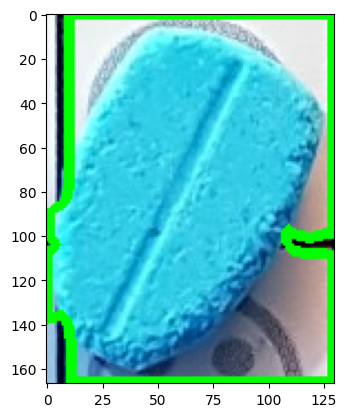

In [9]:
im = cv2.imread(image_path_list_cropped[20])

def get_contours(im):

    imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(imgray, (5,5), cv2.BORDER_DEFAULT)
    canny = cv2.Canny(blur, 220, 230)
    ret, thresh = cv2.threshold(canny, 200, 250, cv2.THRESH_BINARY_INV)
    dilated = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20)))
    contours, hierarchy = cv2.findContours(dilated, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    return contours


contours = get_contours(im)
contours_ranked_df = get_contours_info(contours)
for k, _ in enumerate(contours):
    cnt_subset = contours[contours_ranked_df.reset_index()['index'][0]]
    cv2.drawContours(im, [cnt_subset], -1, (0,255,0), 3)
plt.imshow(im)

In [10]:
contours_ranked_df

,index,shape,size,corners
2,2,rectangle,632.426406,4
1,1,hexagon,10.485281,6
0,0,square,5.656854,4


# Similarity of images?
- See detailed stackoverflow discussion on similarity of images https://stackoverflow.com/questions/11541154/checking-images-for-similarity-with-opencv . I think it would make sense to use the CLIP model from OpenAI and https://github.com/UKPLab/sentence-transformers

In [19]:
# # Load the OpenAI CLIP Model
print('Loading CLIP Model...')
model = SentenceTransformer('clip-ViT-B-32')

Loading CLIP Model...


In [17]:

# Next we compute the embeddings
# To encode an image, you can use the following code:
# from PIL import Image
# encoded_image = model.encode(Image.open(filepath))
image_names = image_path_list_cropped
print("Images:", len(image_names))
encoded_image = model.encode([Image.open(filepath) for filepath in image_names], batch_size=128, convert_to_tensor=True, show_progress_bar=True)

# Now we run the clustering algorithm. This function compares images aganist 
# all other images and returns a list with the pairs that have the highest 
# cosine similarity score
processed_images = util.paraphrase_mining_embeddings(encoded_image)
NUM_SIMILAR_IMAGES = 10 

# =================
# DUPLICATES
# =================
print('Finding duplicate images...')
# Filter list for duplicates. Results are triplets (score, image_id1, image_id2) and is scorted in decreasing order
# A duplicate image will have a score of 1.00
# It may be 0.9999 due to lossy image compression (.jpg)
duplicates = [image for image in processed_images if image[0] >= 0.999]

# Output the top X duplicate images
for score, image_id1, image_id2 in duplicates[0:NUM_SIMILAR_IMAGES]:
    print("\nScore: {:.3f}%".format(score * 100))
    print(image_names[image_id1])
    print(image_names[image_id2])

# =================
# NEAR DUPLICATES
# =================
print('Finding near duplicate images...')
# Use a threshold parameter to identify two images as similar. By setting the threshold lower, 
# you will get larger clusters which have less similar images in it. Threshold 0 - 1.00
# A threshold of 1.00 means the two images are exactly the same. Since we are finding near 
# duplicate images, we can set it at 0.99 or any number 0 < X < 1.00.
threshold = 0.99
near_duplicates = [image for image in processed_images if image[0] < threshold]

for score, image_id1, image_id2 in near_duplicates[0:NUM_SIMILAR_IMAGES]:
    print("\nScore: {:.3f}%".format(score * 100))
    print(image_names[image_id1])
    print(image_names[image_id2])

Images: 23


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Finding duplicate images...
Finding near duplicate images...

Score: 59.965%
images/cropped/ White Rolex.png
images/cropped/NY Yankees – blue and yellow.png

Score: 59.785%
images/cropped/Yellow Ironman_1.png
images/cropped/Blue Kenzo_2.png

Score: 59.297%
images/cropped/Pink_purple Supreme.png
images/cropped/#MeToo – yellow_1.png

Score: 59.156%
images/cropped/#MeToo – yellow_1.png
images/cropped/Four Leaf Clover – green.png

Score: 59.094%
images/cropped/Blue Kenzo_2.png
images/cropped/Yellow Mickey Mouse logo.png

Score: 59.015%
images/cropped/Mortal Combat, pink and blue.png
images/cropped/Gold gram.png

Score: 58.785%
images/cropped/ White Rolex.png
images/cropped/Blue Kenzo_2.png

Score: 58.346%
images/cropped/Four Leaf Clover – green.png
images/cropped/Pink_purple Supreme.png

Score: 57.806%
images/cropped/Blue Kenzo_2.png
images/cropped/Four Leaf Clover – green.png

Score: 57.373%
images/cropped/NY Yankees – blue and yellow.png
images/cropped/Pink_purple Supreme.png


This seems to work pretty well. It identifies the same pill at a high %.

Time to create an app